In [2]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, Dropout


TensorFlow 1.x selected.


Using TensorFlow backend.


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

In [5]:
x_train = mnist.train.images.reshape(-1,28,28,1)
y_train = mnist.train.labels
x_test = mnist.test.images.reshape(-1,28,28,1)
y_test = mnist.test.labels
print(x_train.shape)
y_train.shape


(55000, 28, 28, 1)


(55000, 10)

MNIST demo with 2 convolutional layer:

16 (3x3) convolutional filters

(2x2) max pooling with stride 2

32 (3x3) convolutional filters

(2,2) max pooling with stride 2

1 fully connected layer with 64 neurons

softmax output layer (multi-class problems)


In [ ]:

conv1 = 16
conv2 = 32
flat = 64

model = Sequential()
model.add(Conv2D(conv1,(3,3), activation='relu',input_shape=(28,28,1),padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(conv2,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(flat,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                100416    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)              

In [ ]:
# adding higher batch size will result in the gradient taking a higher step for each movement
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model_data = model.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_test,y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 38s 687us/step - loss: 0.0981 - accuracy: 0.9708 - val_loss: 0.0400 - val_accuracy: 0.9870
Epoch 2/10
55000/55000 [==============================] - 37s 675us/step - loss: 0.0831 - accuracy: 0.9743 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 3/10
55000/55000 [==============================] - 37s 682us/step - loss: 0.0748 - accuracy: 0.9773 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 4/10
55000/55000 [==============================] - 37s 665us/step - loss: 0.0690 - accuracy: 0.9791 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 5/10
55000/55000 [==============================] - 37s 669us/step - loss: 0.0609 - accuracy: 0.9808 - val_loss: 0.0311 - val_accuracy: 0.9897
Epoch 6/10
55000/55000 [==============================] - 37s 674us/step - loss: 0.0539 - accuracy: 0.9830 - val_loss: 0.0284 - val_accuracy: 0.9910
Epoch 7/10
55000/55000 [==============================] 

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 283us/step


In [ ]:
accuracy

0.9918000102043152

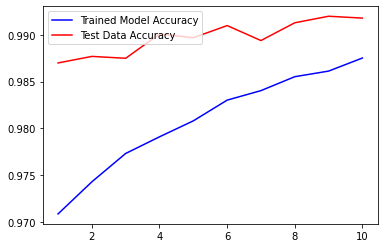

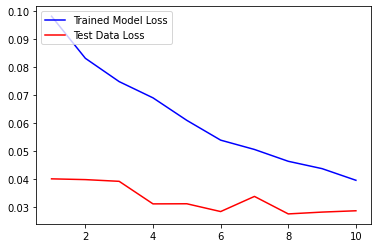

In [ ]:
import matplotlib.pyplot as plt

num_of_iteration = range(1,len(model_data.history['accuracy'])+1)

plt.plot(num_of_iteration,model_data.history['accuracy'],'b', label='Trained Model Accuracy')
plt.plot(num_of_iteration,model_data.history['val_accuracy'],'r',label='Test Data Accuracy')
plt.legend(loc='upper left')
plt.figure()

plt.plot(num_of_iteration,model_data.history['loss'],'b',label='Trained Model Loss')
plt.plot(num_of_iteration,model_data.history['val_loss'],'r',label='Test Data Loss')
plt.legend(loc='upper left')

plt.show()